# **Predict price house - Linear Regression**

## **1. General**

## **2. Libraries and Environment**

In [377]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [378]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [379]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
np.random.seed(42)

## **3. Data loading and Quick glance**

In [381]:
houses = pd.read_csv('./data/data.csv')

In [382]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [383]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [384]:
houses.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [385]:
houses = houses.drop(columns=['street', 'city', 'statezip', 'country', 'waterfront', 'condition', 'view', 'yr_built', 'yr_renovated', 'date'])

In [386]:
houses.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,7912,1.5,1340,0
1,2384000.0,5.0,2.50,3650,9050,2.0,3370,280
2,342000.0,3.0,2.00,1930,11947,1.0,1930,0
3,420000.0,3.0,2.25,2000,8030,1.0,1000,1000
4,550000.0,4.0,2.50,1940,10500,1.0,1140,800


In [387]:
houses.isnull().sum()
# houses = houses.dropna()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
dtype: int64

## **4. Visualization**

In [388]:
# houses = houses[houses['price'].between(100000, 500000)]

In [389]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,1827.265435,312.081522
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,862.168977,464.137228
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,370.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,1190.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,1590.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,9410.000000,4820.000000


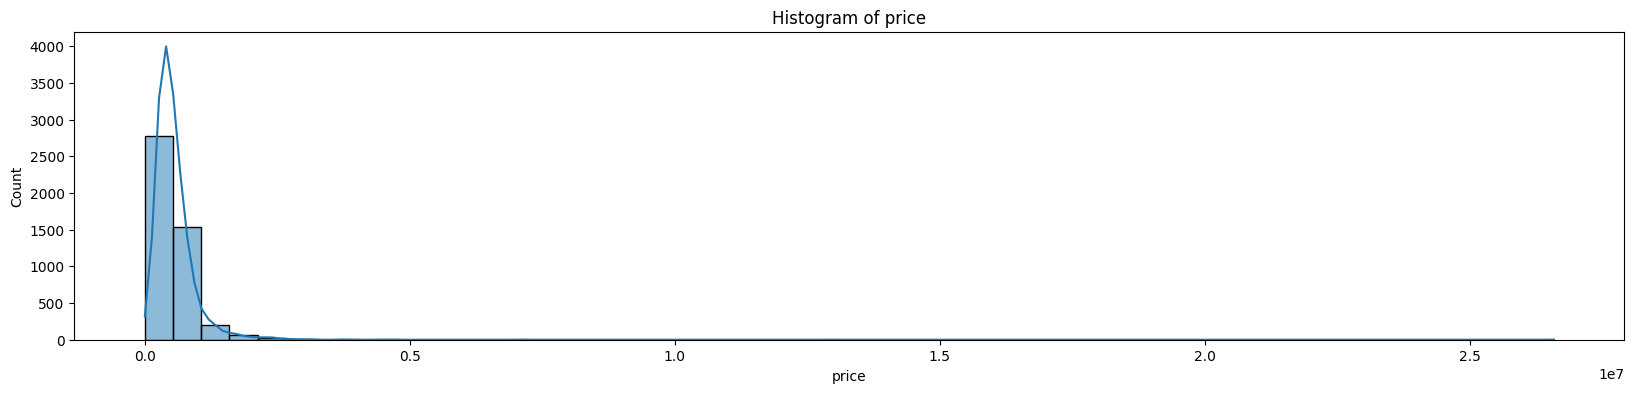

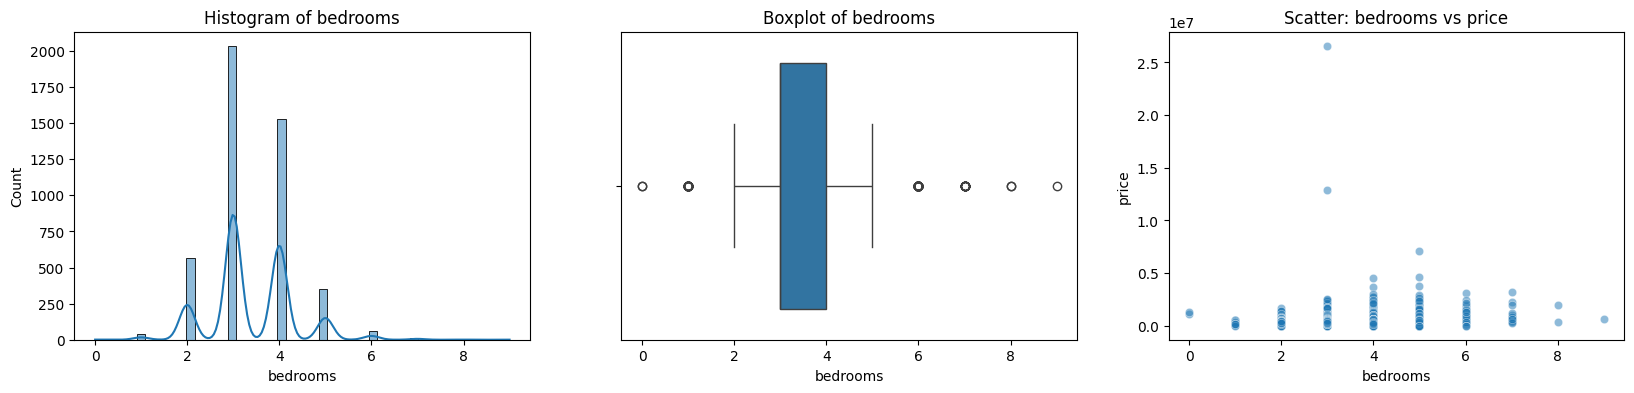

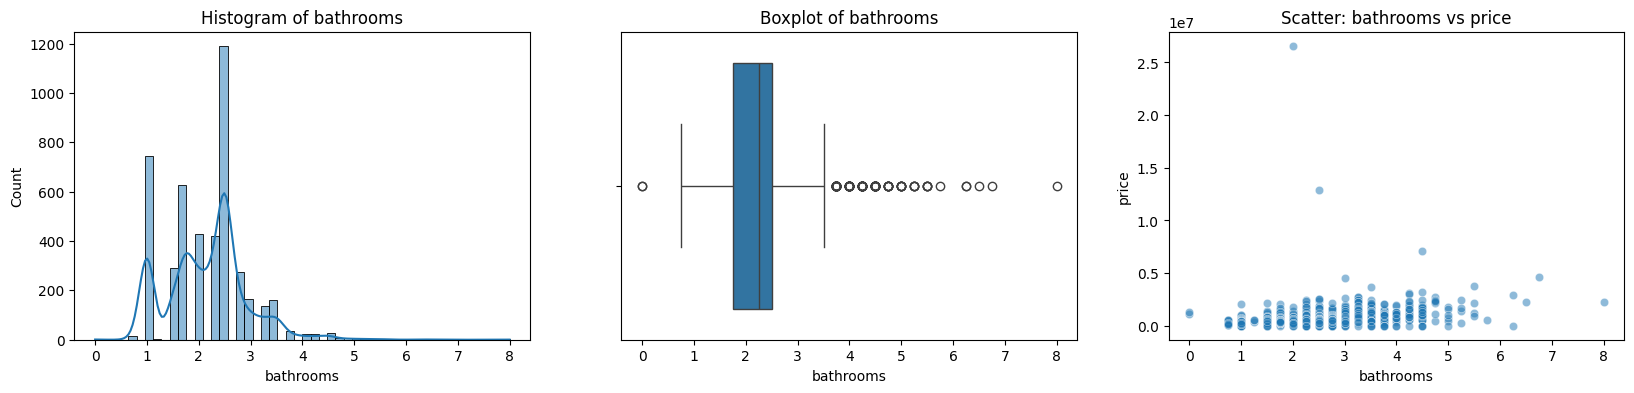

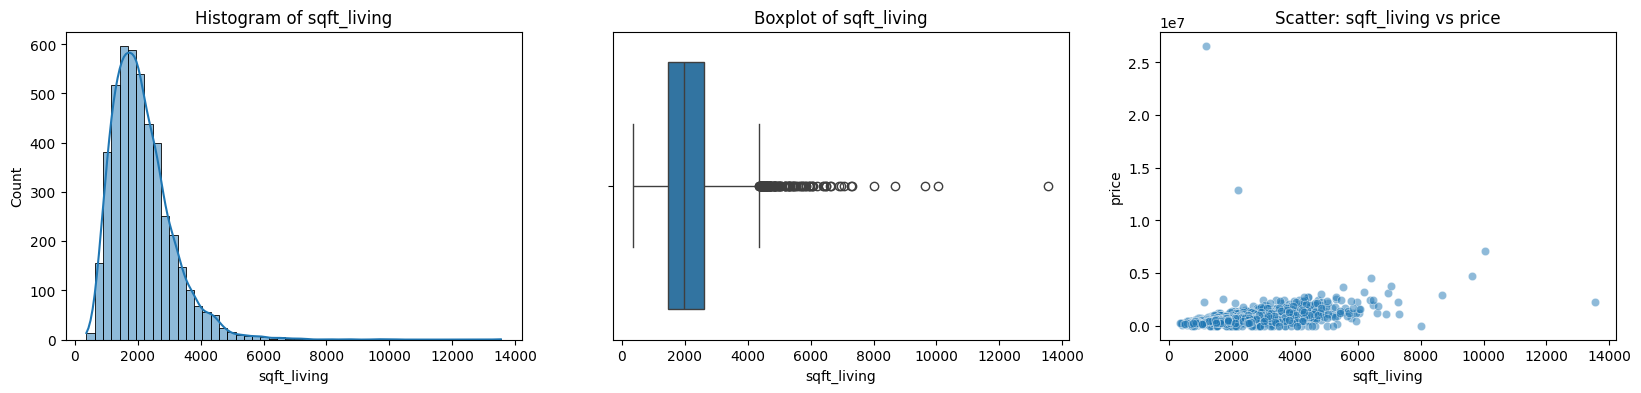

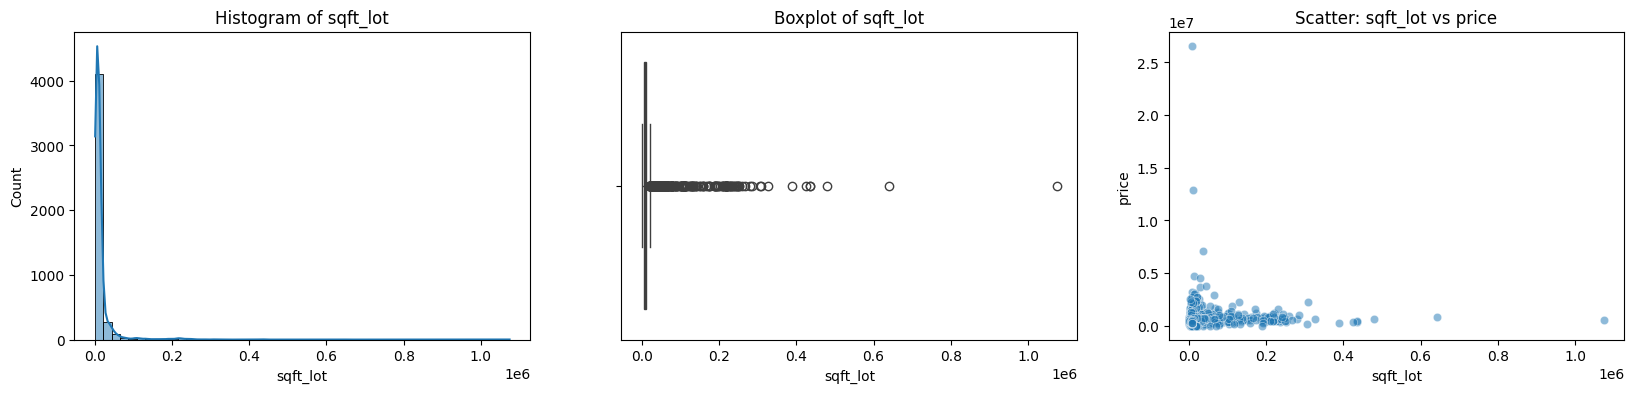

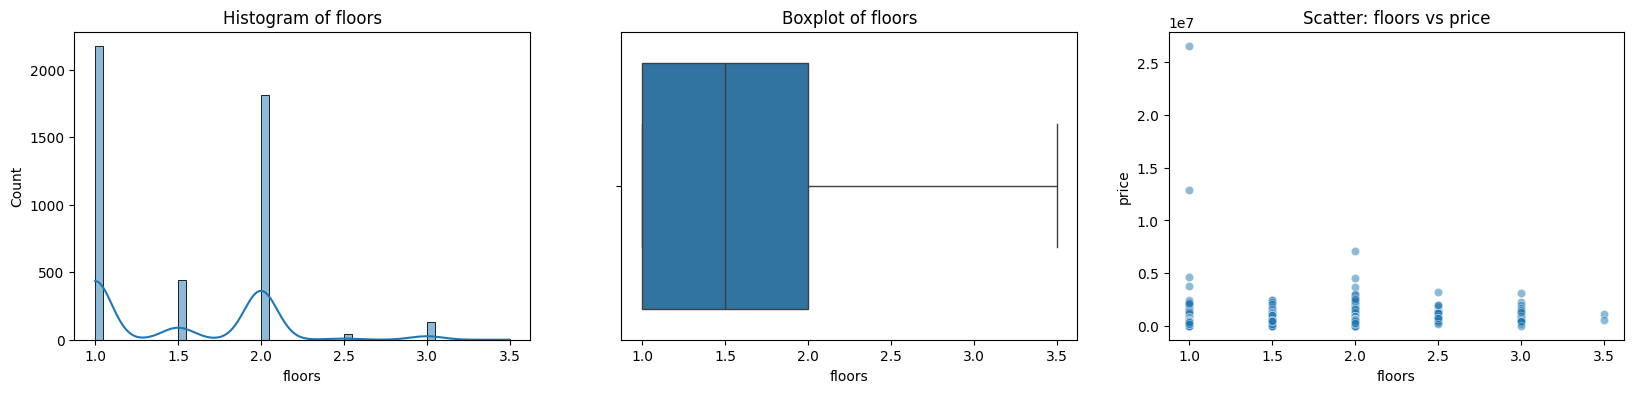

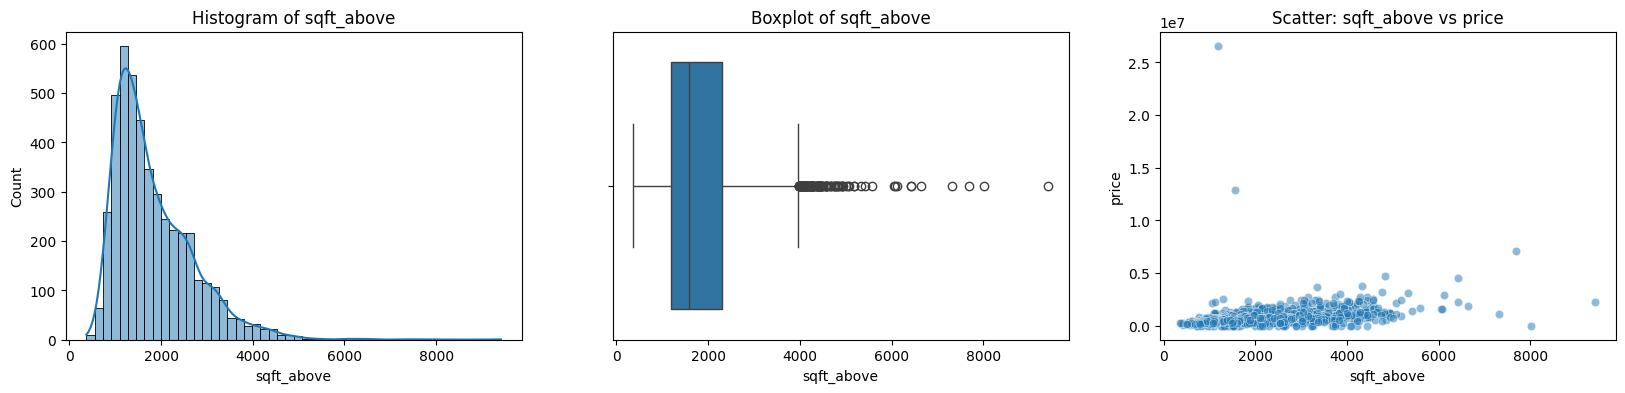

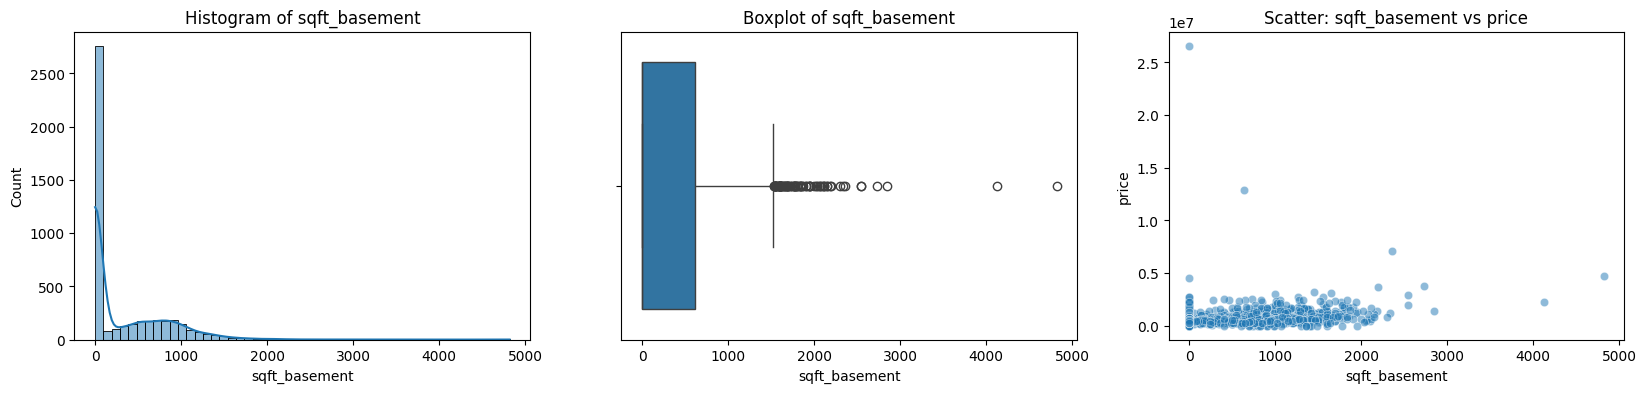

In [390]:
for f in houses.columns:

    if f != 'price':
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 3, 1)
        sns.histplot(houses[f], kde=True, bins=50)
        plt.title(f"Histogram of {f}")

        plt.subplot(1, 3, 2)
        sns.boxplot(x=houses[f])
        plt.title(f"Boxplot of {f}")

        plt.subplot(1, 3, 3)
        sns.scatterplot(x=houses[f], y=houses['price'], alpha=0.5)
        plt.title(f"Scatter: {f} vs price")
    else:
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 1, 1)
        sns.histplot(houses[f], kde=True, bins=50)
        plt.title(f"Histogram of {f}")


## **5. Data splitting & Scale**

In [391]:
X = houses.drop(columns=['price'])
y = houses['price']

In [392]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [393]:
std_scaler = StandardScaler()
X_train_std_scaler = std_scaler.fit_transform(X_train)
X_test_std_scaler = std_scaler.transform(X_test)

In [394]:
mm_scaler = MinMaxScaler()
X_train_mm_scaler = mm_scaler.fit_transform(X_train)
X_test_mm_scaler = mm_scaler.transform(X_test)

## **6. Implementation**

In [395]:
no_scaler_model = LinearRegression()
no_scaler_model.fit(X_train, y_train)

no_scaler_y_pred = no_scaler_model.predict(X_test)

In [396]:
mm_scaler_model = LinearRegression()
mm_scaler_model.fit(X_train_mm_scaler, y_train)

mm_scaler_y_pred = mm_scaler_model.predict(X_test_mm_scaler)

In [397]:
std_scaler_model = LinearRegression()
std_scaler_model.fit(X_train_std_scaler, y_train)

std_scaler_y_pred = std_scaler_model.predict(X_test_std_scaler)

## **7. Evaluation**

In [398]:
no_scaler_mse = mean_squared_error(y_test, no_scaler_y_pred)
no_scaler_rmse = no_scaler_mse ** 0.5
no_scaler_r2 = r2_score(y_test, no_scaler_y_pred)
no_scaler_mae = mean_absolute_error(y_test, no_scaler_y_pred)

mm_scaler_mse = mean_squared_error(y_test, mm_scaler_y_pred)
mm_scaler_rmse = mm_scaler_mse ** 0.5
mm_scaler_r2 = r2_score(y_test, mm_scaler_y_pred)
mm_scaler_mae = mean_absolute_error(y_test, mm_scaler_y_pred)

std_scaler_mse = mean_squared_error(y_test, std_scaler_y_pred)
std_scaler_rmse = std_scaler_mse ** 0.5
std_scaler_r2 = r2_score(y_test, std_scaler_y_pred)
std_scaler_mae = mean_absolute_error(y_test, std_scaler_y_pred)

In [399]:
results = pd.DataFrame({
    "Scaler": ["No", "MinMax", "Standard"],
    "MSE": [no_scaler_mse, mm_scaler_mse, std_scaler_mse],
    "RMSE": [no_scaler_rmse, mm_scaler_rmse, std_scaler_rmse],
    "MAE": [no_scaler_mae, mm_scaler_mae, std_scaler_mae],
    "R²": [no_scaler_r2, mm_scaler_r2, std_scaler_r2]
})

print(results)

     Scaler           MSE           RMSE            MAE        R²
0        No  9.915848e+11  995783.505811  221560.446333  0.027712
1    MinMax  9.915848e+11  995783.505811  221560.446333  0.027712
2  Standard  9.915848e+11  995783.505811  221560.446333  0.027712


In [400]:
print([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

[np.float64(0.0), np.float64(26590000.0)] [np.float64(0.0), np.float64(26590000.0)]


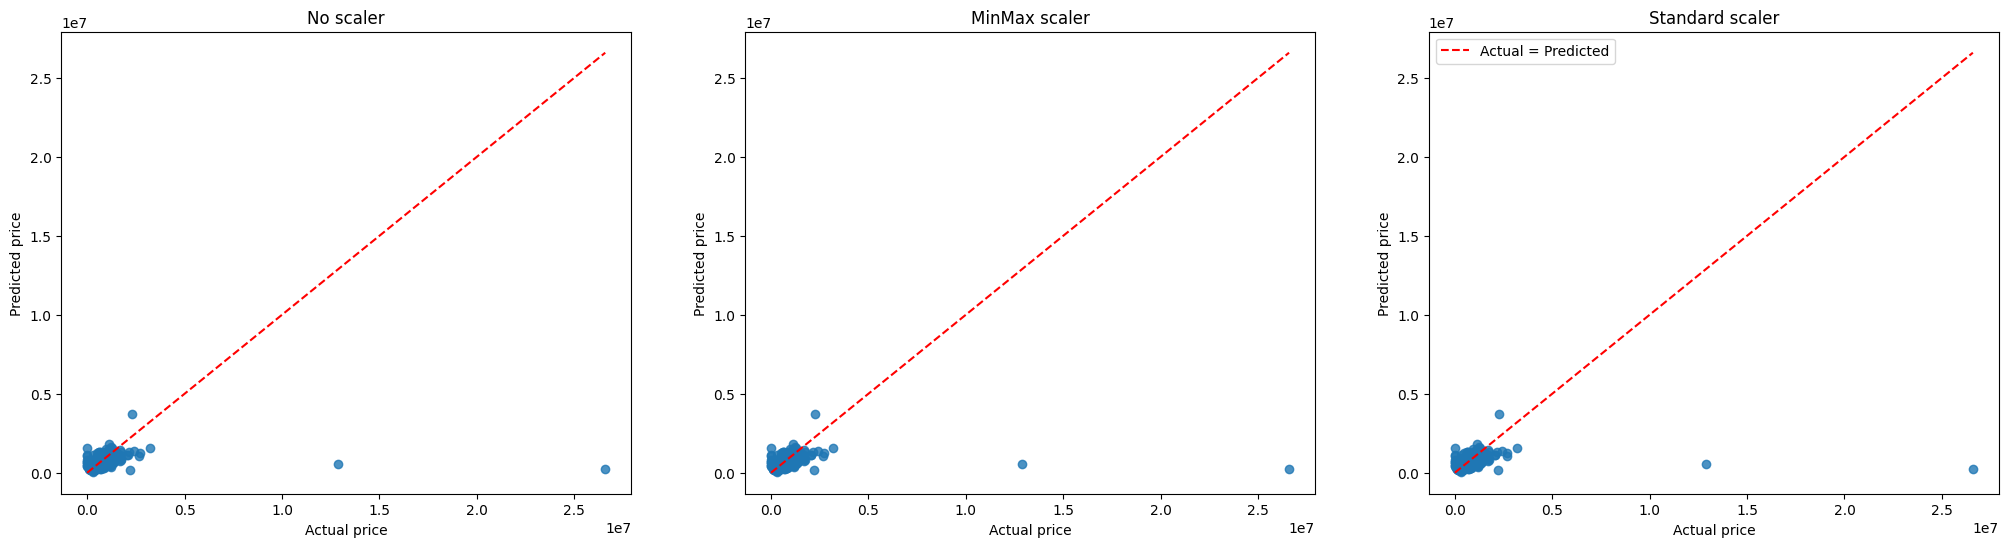

In [401]:
plt.figure(figsize=(25,6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, no_scaler_y_pred, alpha=0.8)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("No scaler")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Actual = Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, mm_scaler_y_pred, alpha=0.8)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("MinMax scaler")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Actual = Predicted")

plt.subplot(1, 3, 3)
plt.scatter(y_test, std_scaler_y_pred, alpha=0.8)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Standard scaler")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Actual = Predicted")

plt.legend()
plt.show()